In [1]:
import pandas as pd

#import data from csv

vaccination = pd.read_csv("data/covid-vaccination-policy.csv")
transport = pd.read_csv("data/public-transport-covid.csv")
stay_home = pd.read_csv("data/stay-at-home-covid.csv")

face_cover = pd.read_csv("data/face-covering-policies-covid.csv")
owid = pd.read_csv("data/owid-covid-data.csv")


#Series with g20 members according to wikipedia + spain
g20_members = pd.Series(["Argentina", "Australia", "Brazil", "Canada", "China", "France", "Germany", "India", "Indonesia", "Italy", "Japan", "South Korea", "Mexico", "Russia", "Saudi Arabia", "South Africa", "Turkey", "United Kingdom", "United States", "Spain", "European Union"])

#filter data array for locations that match g20 countries
g20_data = owid[owid["location"].isin(g20_members)].reset_index(drop=True)

In [2]:
g20_face_cover = face_cover[face_cover["Entity"].isin(g20_members)].reset_index(drop=True)

In [3]:
g20_face_cover

,Entity,Code,Day,facial_coverings
0,Argentina,ARG,2020-01-01,0
1,Argentina,ARG,2020-01-02,0
2,Argentina,ARG,2020-01-03,0
3,Argentina,ARG,2020-01-04,0
4,Argentina,ARG,2020-01-05,0
...,...,...,...,...
10500,United States,USA,2021-05-18,4
10501,United States,USA,2021-05-19,4
10502,United States,USA,2021-05-20,4
10503,United States,USA,2021-05-21,4


C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

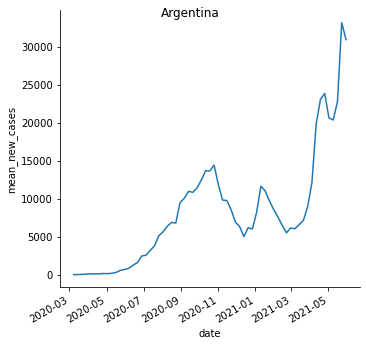

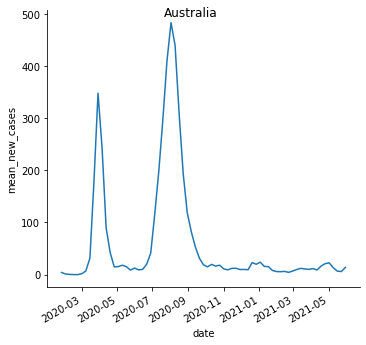

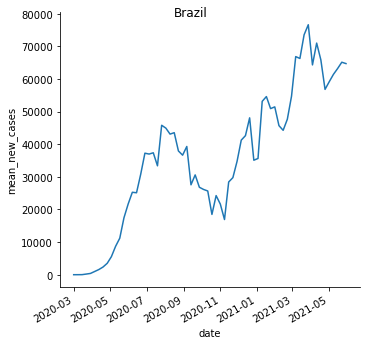

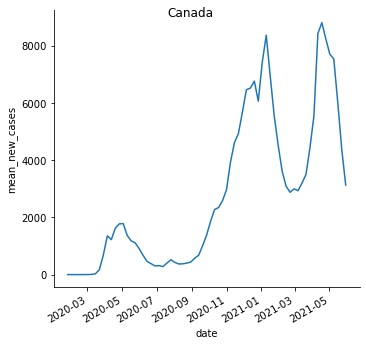

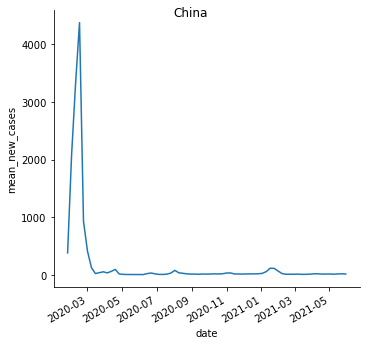

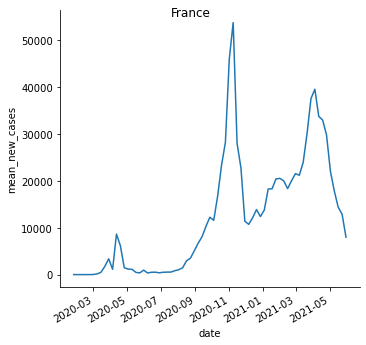

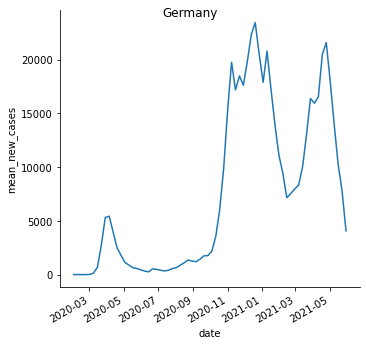

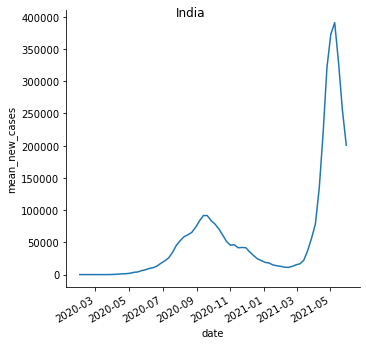

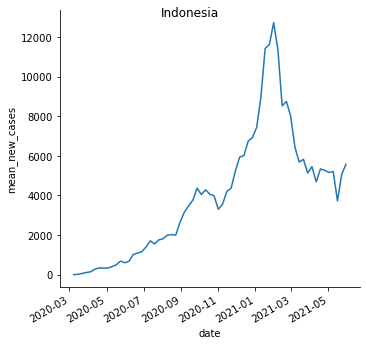

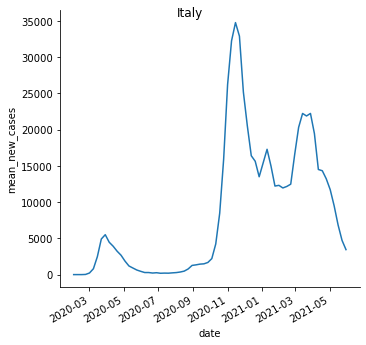

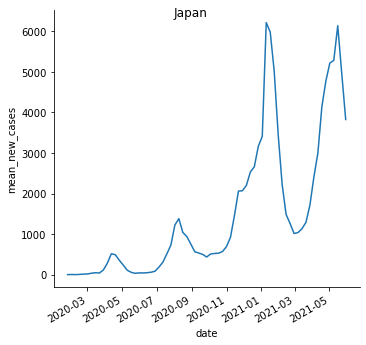

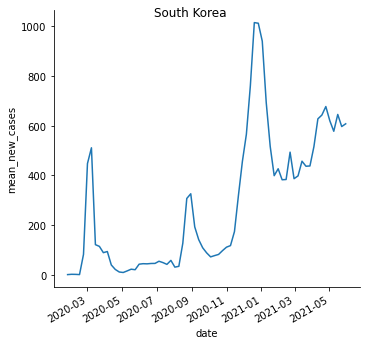

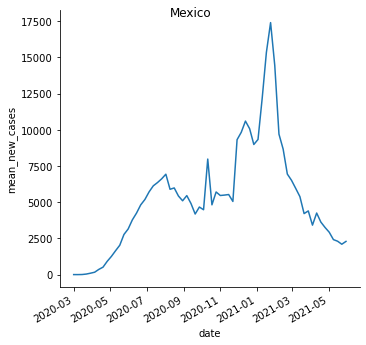

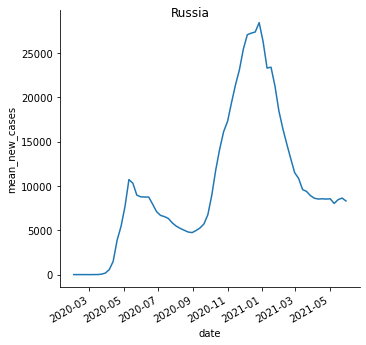

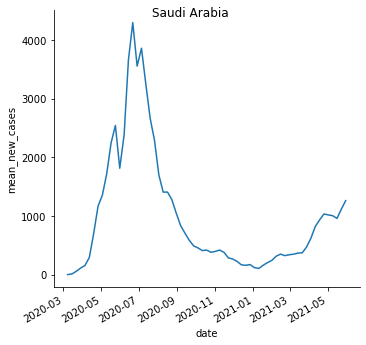

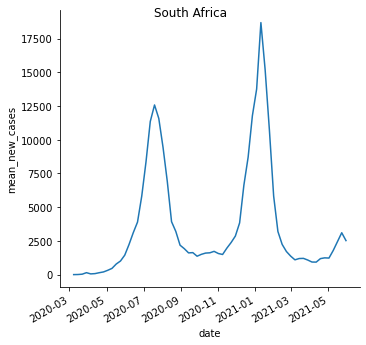

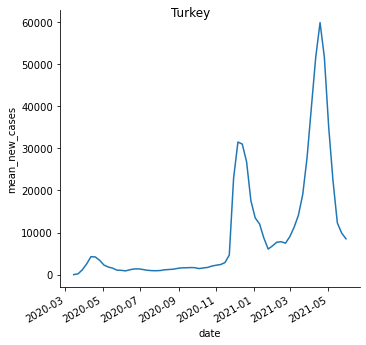

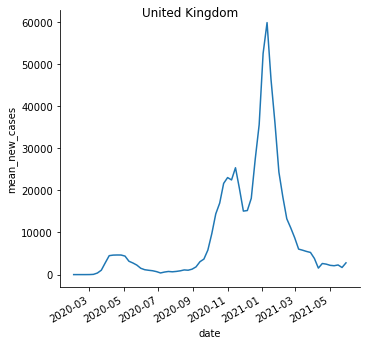

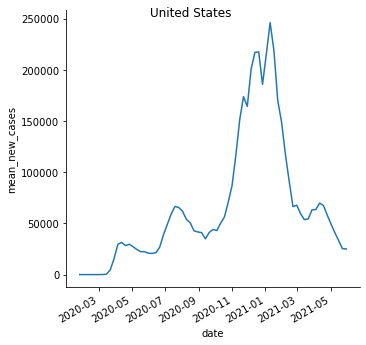

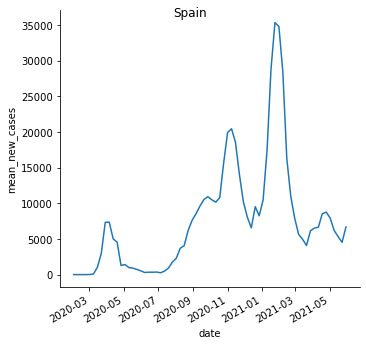

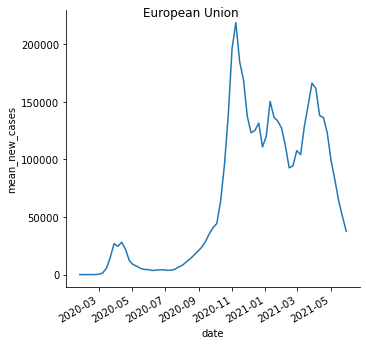

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
#plot each countries in g20
for loc in g20_members:
    only_pain = g20_data[g20_data["location"]==loc]
    bg = g20_face_cover[g20_face_cover["Entity"]==loc]

    #make sure date is in datetime format
    only_pain["date"] = pd.to_datetime(only_pain["date"], yearfirst=True)

    #group by week -> each group gets mean cases of it's days assigned
    grouped_pain = only_pain.groupby([pd.Grouper(key="date", freq= "W")]).mean()
    
    #negative to positive
    grouped_pain["new_cases"] = grouped_pain["new_cases"].map(lambda x: abs(x), na_action="ignore")
    #plot
    f = sns.relplot(data = grouped_pain, x = "date", y= "new_cases", kind="line")
    f.fig.autofmt_xdate()
    f.set_ylabels("mean_new_cases")
    f.fig.suptitle(loc)

    